In [1]:
# encoding: utf-8
# Author: Zhuangwei Kang

import os, sys
import matplotlib.pyplot as plt
from matplotlib import style
sys.path.append('../../')
from datapsr import *
import numpy as np
style.use(['classic'])
plt.rc('axes', axisbelow=True)
dpi=600

[ 6.1 23.8 86.2 93.  93.4]
[ 5.7 22.5 81.2 93.1 93.5]
[ 6.55737705  5.46218487  5.80046404 -0.10752688 -0.10706638]


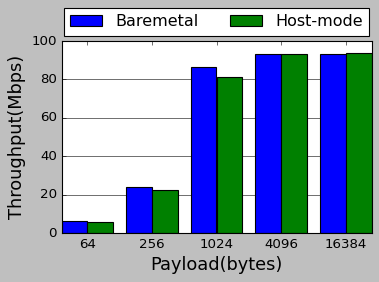

In [2]:
plt.figure(figsize=(5,3))
plugins = ['baremetal-udp', 'hostnetwork-udp']
data_len = [64, 256, 1024, 4096, 16384]
perf, _ = load_data(range(len(data_len)), plugins)

plt.xticks(range(len(data_len)), data_len)
markers = ['^', 'o', 'X', 'P', 's']
labels = ['Baremetal', 'Host-mode']
x = np.arange(len(data_len))
plt.xticks(x, data_len)
total_width, n = 0.8, len(plugins)
width = total_width / n
x = x - (total_width - width) / 2


for i, cni in enumerate(plugins):
    throughput = perf[perf['cni'] == cni]['mbps(ave)'].to_numpy()
    print(throughput)
    plt.bar(x+i*width, throughput, label=labels[i], width=width)
    if cni == 'baremetal-udp':
        baremetal = throughput
    else:
        host_mode = throughput

overhead = 100 * (baremetal - host_mode) / baremetal
print(overhead)

plt.legend(bbox_to_anchor=(0.5, 1.1), ncol=2, loc='center', scatterpoints = 1)
plt.xlabel('Payload(bytes)', fontsize=16)
plt.ylabel('Throughput(Mbps)', fontsize=16)
plt.grid(linestyle='-', axis='y')
plt.savefig('throughput.png', dpi=dpi, bbox_inches='tight')


In [3]:
plt.figure(figsize=(5,3))
plt.xticks(range(len(data_len)), data_len)
pub_host_cpu = {}
sub_host_cpu = {}
x = np.arange(6)

x = np.arange(len(data_len))
plt.xticks(x, data_len)
total_width, n = 0.8, len(plugins)
width = total_width / n
x = x - (total_width - width) / 2
for j, cni in enumerate(plugins):
    print(cni)
    pub_cpu = []
    pub_cpu_std = []
    sub_cpu = []
    sub_cpu_std = []
    for i in np.arange(len(data_len)):
        data = pd.read_csv('throughputTest/%s/test-%d/metrics.csv' % (cni, i))
        pub_cpu.append(data[data['name'] == 'raspberrypi87']['cpu%(90%)'])
        sub_cpu.append(data[data['name'] == 'raspberrypi89']['cpu%(90%)'])
        pub_cpu_std.append(data[data['name'] == 'raspberrypi87']['cpu%(std)'])
        sub_cpu_std.append(data[data['name'] == 'raspberrypi89']['cpu%(std)'])
    
    plt.bar(x+j*width, np.reshape(np.array(pub_cpu), len(x)), yerr=np.reshape(np.array(pub_cpu_std), len(x)), width=width, color='C%d' % j, label=labels[j])

plt.legend(bbox_to_anchor=(0.5, 1.25), ncol=2, loc='center')
plt.xlabel('Payload(bytes)', fontsize=16)
plt.ylabel('Pub Host CPU(%)', fontsize=16)
plt.grid(axis='y', linestyle='-')
plt.savefig('cpu.png', dpi=dpi, bbox_inches='tight')

baremetal-udp


FileNotFoundError: [Errno 2] File b'throughputTest/baremetal-udp/test-0/metrics.csv' does not exist: b'throughputTest/baremetal-udp/test-0/metrics.csv'

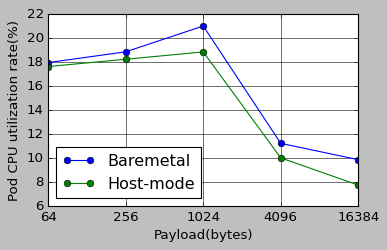

In [4]:
plt.figure(figsize=(5,3))
plt.xticks(range(len(data_len)), data_len)
for i, cni in enumerate(plugins):
    cpu = perf[perf['cni'] == cni]['cpu']
    plt.plot(np.arange(len(data_len)), cpu, label=labels[i], marker='o')

plt.legend(loc='best')
plt.xlabel('Payload(bytes)')
plt.ylabel('Pod CPU utilization rate(%)')
plt.grid(linestyle='-')
plt.show()

[97.5, 86.2, 148.0, 118.2, 155.3]
[194.5, 226.7, 229.0, 281.9, 354.6]
[-0.17574692  0.6504065  -0.12135922  1.05691057  1.5459364 ]


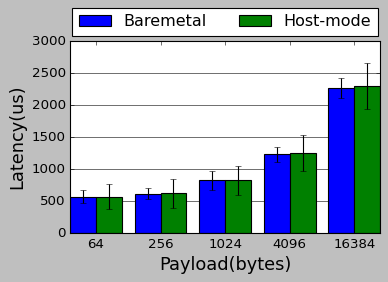

In [7]:
plt.figure(figsize=(5,3))
_, latency_perf = load_data(np.arange(len(data_len)), plugins, latencyTest=True)
x = np.arange(len(data_len))
plt.xticks(x, data_len)
total_width, n = 0.8, len(plugins)
width = total_width / n
x = x - (total_width - width) / 2

for i, cni in enumerate(plugins):
    lat = latency_perf[latency_perf['cni'] == cni]['latencyave'].to_list()
    lat_err = latency_perf[latency_perf['cni'] == cni]['std'].to_list()
    print(lat_err)
    plt.bar(x+i*width, lat, label=labels[i], width=width, yerr=lat_err, capsize=3)
    if cni == 'baremetal-udp':
        baremetal = np.array(lat)
    else:
        host_mode = np.array(lat)

overhead = 100 * (host_mode - baremetal) / baremetal
print(overhead)

plt.legend(bbox_to_anchor=(0.5, 1.1), ncol=2, loc='center', scatterpoints = 1)
plt.xlabel('Payload(bytes)', fontsize=16)
plt.ylabel('Latency(us)', fontsize=16)
plt.grid(linestyle='-', axis='y')
plt.savefig('latency.png', dpi=dpi, bbox_inches='tight')

ipykernel_launcher:37: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


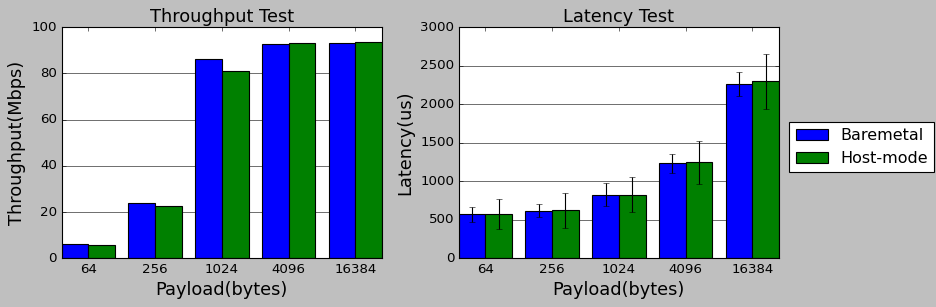

In [95]:
thp = [[ 6.1, 23.8, 86.2, 93.0,  93.4], [ 5.7, 22.5, 81.2, 93.1, 93.5]]
lat = [[569.0, 615.0, 824.0, 1230.0, 2264.0], [568.0, 619.0, 823.0, 1243.0, 2299.0]]
lat_std = [[97.5, 86.2, 148.0, 118.2, 155.3], [194.5, 226.7, 229.0, 281.9, 354.6]]

labels = ['Baremetal', 'Host-mode']
fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharex=True)
bars = []
def helper(i, j, data, err, xlabel, ylabel, title=None):
    global ax, bars
    x = np.arange(len(data_len))
    total_width, n = 0.8, len(plugins)
    width = total_width / n
    x = x - (total_width - width) / 2
    if err is not None:
        ax[j].bar(x+i*width, data[i], width=width, yerr=err[i])
    else:
        ax[j].bar(x+i*width, data[i], width=width)
    ax[j].grid(linestyle='-', axis='y')
    ax[j].set_ylabel(ylabel, fontsize=16)
    ax[j].set_xlabel(xlabel, fontsize=16)
    ax[j].set_title(title, fontsize=16)
    bars.append(ax[j])


plt.xticks(x+(total_width - width) / 2, data_len)
helper(0, 0, thp, None, 'Payload(bytes)', 'Throughput(Mbps)', 'Throughput Test')
helper(1, 0, thp, None, 'Payload(bytes)', 'Throughput(Mbps)', 'Throughput Test')
helper(0, 1, lat, lat_std, 'Payload(bytes)', 'Latency(us)', 'Latency Test')
helper(1, 1, lat, lat_std, 'Payload(bytes)', 'Latency(us)', 'Latency Test')

fig.legend([bars[0], bars[1]],     # The line objects
           labels=labels,   # The labels for each line
           loc="right",   # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           bbox_to_anchor=(1.17, 0.5),
        #    title="Legend Title",  # Title for the legend
           ncol=1
           )
plt.tight_layout()
plt.savefig('virtualization.png', dpi=600, bbox_inches='tight')